# Decision Tree Classification - Heart Disease

## Import Necessary Libraries

In [45]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## -- ML Related LIbraries####
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Load the dataset heart

In [46]:
## For Google Drive URL
#file_id = "1B95_hrMGmoPE6fFAkU_iTAtzLBTVmPkL"
#url = f"https://drive.google.com/uc?id={file_id}"

# Github url
url = 'https://github.com/vmahawar/data-science-datasets-collection/raw/main/heart_disease.csv'
df = pd.read_csv(url)

In [47]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [48]:
## target (Y) ----> 'heart disease'
## feature (X) ----> 'age','sex','BP','cholestrol'
## Binary Classification Problem

In [49]:
df["heart disease"].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

### 0 - no heart disease
### 1 - heart disease

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [51]:
df.isnull().mean()

age              0.0
sex              0.0
BP               0.0
cholestrol       0.0
heart disease    0.0
dtype: float64

## Perform Train Test Split

In [52]:
# Missing Value imputation is not mandatory in Tree Models
# Scaling is not mandatory in Tree Models #In industry people do not do it
# Outlier Treatment is not mandatory in Tree Models #In industry people do not do it
# EDA still has to be done irresepctive of model algorithm

In [53]:
X = df[["age","sex","BP","cholestrol"]]
y = df['heart disease']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Validate the shape of train and test

In [55]:
X_train.shape

(189, 4)

In [56]:
X_test.shape

(81, 4)

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

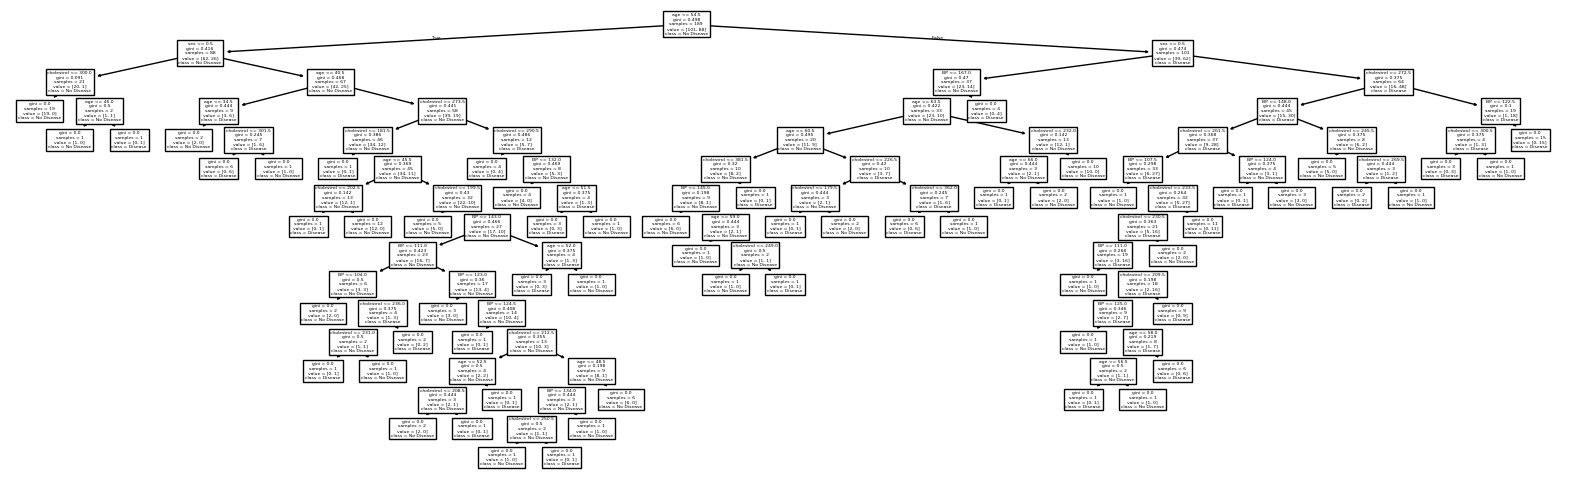

In [58]:
plt.figure(figsize=[20,6])
plot_tree(dt,feature_names=X.columns.tolist(),
          class_names=['No Disease','Disease']) #0,1
plt.show()


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [61]:
# max_depth = 3, Train = 

print("Train Accuracy:", round(100*accuracy_score(y_train,y_train_pred),2),"%")
print("Test Accuracy:", round(100*accuracy_score(y_test,y_test_pred),2),"%")

Train Accuracy: 100.0 %
Test Accuracy: 66.67 %


## Using Max-Depth = 3

In [62]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

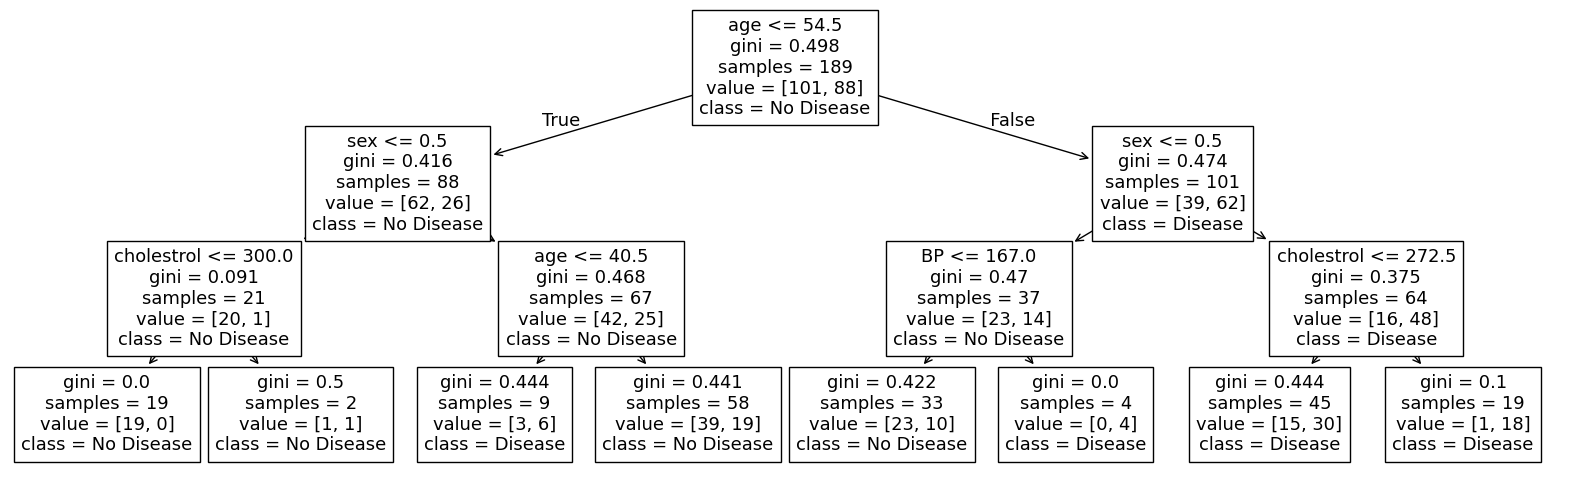

In [63]:
plt.figure(figsize=[20,6])
plot_tree(dt,feature_names=X.columns.tolist(),
          class_names=['No Disease','Disease']) #0,1
plt.show()


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [65]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [66]:
# max_depth = 3, Train = 

print("Train Accuracy:", round(100*accuracy_score(y_train,y_train_pred),2),"%")
print("Test Accuracy:", round(100*accuracy_score(y_test,y_test_pred),2),"%")

Train Accuracy: 74.07 %
Test Accuracy: 60.49 %


## Using Max-Depth = 2

In [67]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

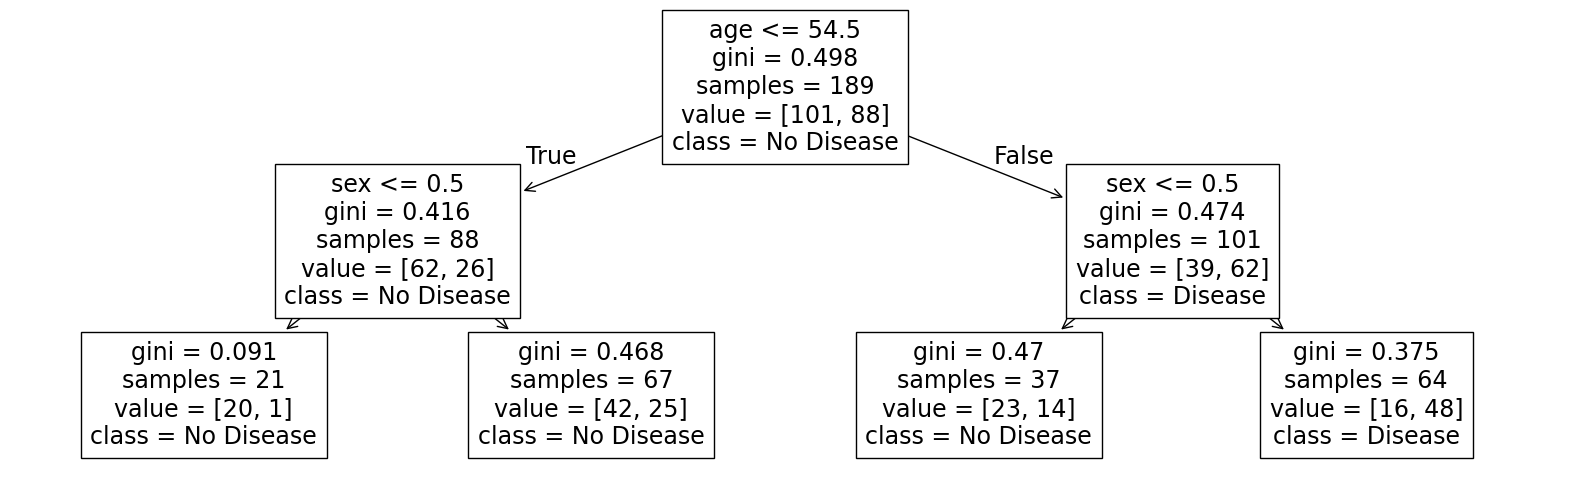

In [68]:
plt.figure(figsize=[20,6])
plot_tree(dt,feature_names=X.columns.tolist(),
          class_names=['No Disease','Disease']) #0,1
plt.show()


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [70]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [71]:
# max_depth = 3, Train = 

print("Train Accuracy:", round(100*accuracy_score(y_train,y_train_pred),2),"%")
print("Test Accuracy:", round(100*accuracy_score(y_test,y_test_pred),2),"%")

Train Accuracy: 70.37 %
Test Accuracy: 64.2 %


## Using Max-Depth = 1

In [72]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

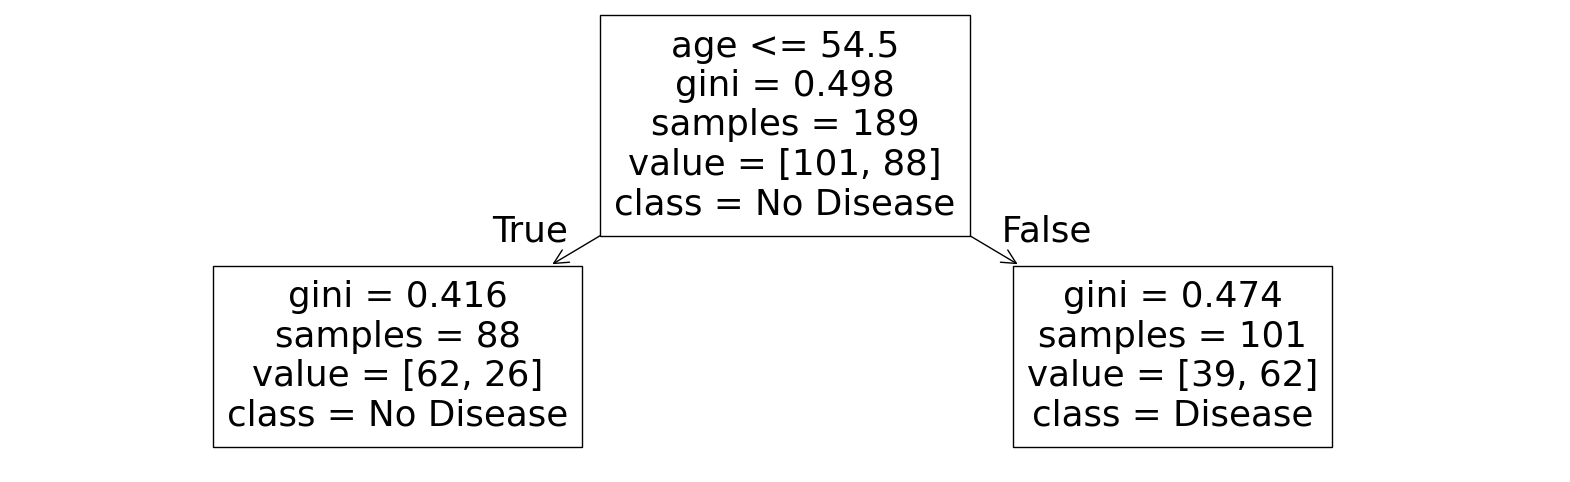

In [73]:
plt.figure(figsize=[20,6])
plot_tree(dt,feature_names=X.columns.tolist(),
          class_names=['No Disease','Disease']) #0,1
plt.show()


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [75]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [76]:
# max_depth = 3, Train = 

print("Train Accuracy:", round(100*accuracy_score(y_train,y_train_pred),2),"%")
print("Test Accuracy:", round(100*accuracy_score(y_test,y_test_pred),2),"%")

Train Accuracy: 65.61 %
Test Accuracy: 59.26 %


In [77]:
# Print default parameters
print("Default splitting criterion:", dt.criterion)

Default splitting criterion: gini


## Try different criterion - entropy or information gain

In [78]:
dt = DecisionTreeClassifier(max_depth=3,criterion='entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

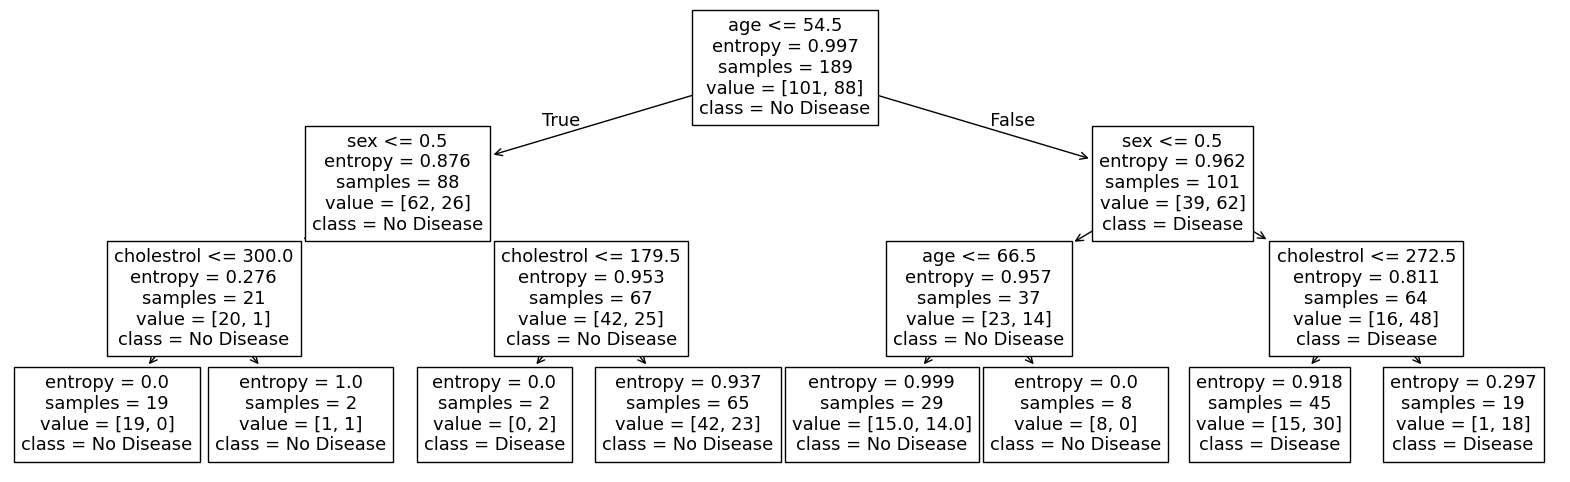

In [79]:
plt.figure(figsize=[20,6])
plot_tree(dt,feature_names=X.columns.tolist(),
          class_names=['No Disease','Disease']) #0,1
plt.show()


In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [81]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [82]:
# max_depth = 3, Train = 

print("Train Accuracy:", round(100*accuracy_score(y_train,y_train_pred),2),"%")
print("Test Accuracy:", round(100*accuracy_score(y_test,y_test_pred),2),"%")

Train Accuracy: 71.43 %
Test Accuracy: 65.43 %


In [83]:
# Print default parameters
print("Default splitting criterion:", dt.criterion)

Default splitting criterion: entropy
